In [1]:
import os
import wget
import matplotlib.pyplot as plt

In [2]:
file = 'titanic.csv'
if os.path.isfile(file):
    print('file exists')
else:
    wget.download('https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/titanic.csv', file)

In [3]:
import pandas as pd
df = pd.read_csv(file)

In [4]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.columns

Index(['passengerid', 'name', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'survived'],
      dtype='object')

In [7]:
df.head()

,passengerid,name,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [11]:
df.drop(columns=['passengerid', 'name', 'sibsp', 'parch','ticket',  'cabin', 'embarked'], inplace=True)

In [12]:
df.head()

,pclass,sex,age,fare,survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [13]:
dummies = pd.get_dummies(df['sex'])

In [16]:
df = pd.concat([df,dummies], axis=1)

In [18]:
df.drop(columns=['sex','male'], inplace=True)

In [20]:
df['survived'] = df.pop('survived')

In [26]:
df.isnull().any()

pclass      False
age          True
fare        False
female      False
survived    False
dtype: bool

In [30]:
df['female'] = df['female'].astype('int')

In [34]:
df['age'] = df['age'].fillna(df['age'].median())

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   age       891 non-null    float64
 2   fare      891 non-null    float64
 3   female    891 non-null    int64  
 4   survived  891 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [36]:
df.head()

,pclass,age,fare,female,survived
0,3,22.0,7.2500,0,0
1,1,38.0,71.2833,1,1
2,3,26.0,7.9250,1,1
3,1,35.0,53.1000,1,1
4,3,35.0,8.0500,0,0


In [37]:
X = df.drop(columns=['survived'])
y = df['survived']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [39]:
from sklearn.naive_bayes import GaussianNB
gauss_nbayes = GaussianNB() 

In [40]:
gauss_nbayes.fit(X_train, y_train)

GaussianNB()

In [46]:
y_pred = gauss_nbayes.predict(X_test)

In [47]:
gauss_nbayes.score(X_test, y_test)

0.7597765363128491

In [48]:
from sklearn import metrics
import seaborn as sns

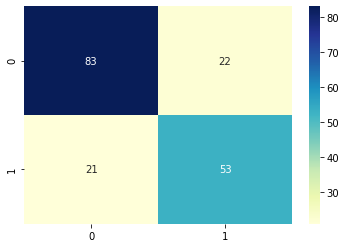

In [51]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='YlGnBu')

In [65]:
X = df.drop(columns=['survived'])
y = df['survived']

In [68]:
X[:1]

,pclass,age,fare,female
0,3,22.0,7.25,0


In [83]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=5)

In [84]:
for train_index, test_index in skfold.split(X, y):
    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index], y.loc[train_index], y.loc[test_index]
    gauss_nbayes.fit(X_train, y_train)
    print('{:.2f}'.format(gauss_nbayes.score(X_test, y_test)))

0.71
0.80
0.78
0.76
0.79


In [85]:
from sklearn.model_selection import cross_val_score
cross_val_score(gauss_nbayes, X, y, cv=5)

array([0.70949721, 0.79775281, 0.78089888, 0.76404494, 0.79213483])

#### spam ham detection

In [153]:
file = 'email.csv'
if os.path.isfile(file):
    print('file exists')
else:
    wget.download('https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/spam.csv', file)

file exists


In [154]:
df = pd.read_csv(file)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [155]:
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()

In [156]:
df['target'] = lencoder.fit_transform(df['Category'])

In [157]:
df.columns = df.columns.str.lower()

In [158]:
df.head()

,category,message,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [159]:
X = df['message']
y = df['target']

In [160]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [162]:
models = [MultinomialNB(), BernoulliNB()]

In [163]:
vectorizer= CountVectorizer()
skfold = StratifiedKFold(n_splits = 5)

In [169]:
for model in models:
    for train_index, test_index in skfold.split(X, y):
        X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index], \
                                           y.loc[train_index], y.loc[test_index]
        X_train = vectorizer.fit_transform(X_train)
        X_test = vectorizer.transform(X_test)
        model.fit(X_train, y_train)
        print('Model: {}, Score: {:.2f}'.format(model, model.score(X_test, y_test)))

Model: MultinomialNB(), Score: 0.98
Model: MultinomialNB(), Score: 0.99
Model: MultinomialNB(), Score: 0.98
Model: MultinomialNB(), Score: 0.98
Model: MultinomialNB(), Score: 0.99
Model: BernoulliNB(), Score: 0.98
Model: BernoulliNB(), Score: 0.98
Model: BernoulliNB(), Score: 0.97
Model: BernoulliNB(), Score: 0.97
Model: BernoulliNB(), Score: 0.98


In [170]:
X = df['message']
y = df['target']

In [173]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [175]:
models = [MultinomialNB(), BernoulliNB()]
for model in models:
    print(cross_val_score(model, X, y, cv=5))

[0.97847534 0.9793722  0.97845601 0.98114901 0.97935368]
[0.98565022 0.97668161 0.97576302 0.97755835 0.98473968]


#### Pipeline

In [176]:
from sklearn.pipeline import Pipeline

In [183]:
model_pipe= Pipeline([('vectorizer', CountVectorizer()), ('multi_bayes', MultinomialNB())])
X = df['message']
y = df['target']

In [184]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits = 5)
for train_index, test_index in skfold.split(X, y):
    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index], \
                                       y.loc[train_index], y.loc[test_index]
    model_pipe.fit(X_train, y_train)
    print(model_pipe.score(X_test, y_test))

0.9829596412556054
0.9856502242152466
0.9829443447037702
0.9829443447037702
0.9865350089766607


#### Exercise

In [185]:
from sklearn.datasets import load_wine
wine = load_wine()

In [186]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [187]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [189]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [191]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [197]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

In [204]:
models = [GaussianNB(), MultinomialNB(), BernoulliNB()]
skfold = StratifiedKFold(n_splits=3)
cm = []
for model in models:
    for train_index, test_index in skfold.split(wine.data, wine.target):
        X_train, X_test, y_train, y_test = wine.data[train_index], wine.data[test_index],\
                                           wine.target[train_index], wine.target[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print('Model: {}, Score: {:.2f}'.format(model, model.score(X_test, y_test)))
        cm.append(metrics.confusion_matrix(y_test, y_pred))
#sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap='YlGnBu')

Model: GaussianNB(), Score: 0.95
Model: GaussianNB(), Score: 0.97
Model: GaussianNB(), Score: 0.97
Model: MultinomialNB(), Score: 0.72
Model: MultinomialNB(), Score: 0.81
Model: MultinomialNB(), Score: 0.97
Model: BernoulliNB(), Score: 0.40
Model: BernoulliNB(), Score: 0.39
Model: BernoulliNB(), Score: 0.41


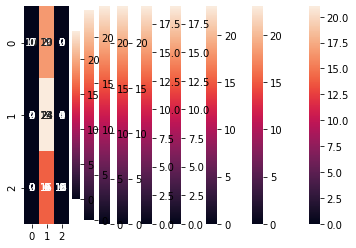

In [207]:
for item in cm: 
    sns.heatmap(item, annot=True)